In [1]:
import string
import matplotlib.pyplot as plt
import gensim
import nltk
import pandas as pd
from gensim import corpora, models
from gensim.models.ldamodel import LdaModel

In [7]:
datContent = [i.strip().split() for i in open("ap/ap.dat").readlines()]

In [8]:
texts = []
for i in open("ap/ap.txt").readlines():
    if not i.startswith(('<DOC>','<DOC>\n', '<DOCNO>','<DOCNO>\n', '<TEXT>', ' </TEXT>\n', '</TEXT>', '</DOC>','</DOC>\n', ' cicomment\n', 'cicomment', '\n')):
        texts.append(i)

In [91]:
# min = 1000
# idx = 0
# mas = []
# for _, i in enumerate(texts_):
#     if len(i) <= min:
#         idx = i
#         min = len(i)
#         mas.append((idx, min, _))
#     print(len(i))


3330
3483
3030
2595
1085
5405
2128
724
78
1512
622
1300
1931
388
3368
1645
2157
4267
2252
4490
644
107
82
1023
4412
2479
3387
1256
5233
3366
4898
4110
903
1224
2985
1367
3234
2355
3199
1164
4313
1558
5440
1439
2172
2812
1119
3354
2473
4139
1081
954
2805
2038
2111
1145
4956
1463
2628
117
3379
3724
3485
3494
459
1107
2269
3357
945
1839
1143
1905
1425
963
1588
7542
5047
2170
3967
4992
5950
1667
1974
1178
3317
3631
2542
1096
799
2397
2149
1945
1267
3081
5068
4104
2915
255
2517
2595
5727
4090
89
3931
996
1302
1498
2100
3207
2484
1735
2387
1547
1080
4149
3607
4527
4186
2935
1281
755
388
590
3398
1173
3729
3182
465
1513
1762
641
4668
724
2632
3356
3012
3742
1043
2211
4237
3208
2103
4581
1720
2437
3236
2208
2757
324
3691
555
818
2770
1387
1574
4723
1505
3653
4054
845
1142
2627
2681
4299
280
3004
3504
4465
4236
5040
2976
4206
631
3129
1640
3128
1473
803
2260
3513
1674
1747
3161
2748
3123
1300
644
2733
1237
1818
2342
4657
968
3033
2523
4474
2345
2096
3106
989
3277
3583
3414
1747
1137
1072
3763
1

In [25]:
texts = [i.strip() for i in open("ap/ap.txt").readlines() if not i.startswith('<') and not i.startswith(' <')]
texts = [i for i in texts if i != 'cicomment' and i != '']

In [26]:
corpus = corpora.BleiCorpus('ap/ap.dat', 'ap/vocab.txt')
model = models.ldamodel.LdaModel(corpus, id2word=corpus.id2word)
doc = corpus.docbyoffset(0)  # первый документ
topics = model[doc]

num_topics_used = [len(model[doc]) for doc in corpus]
print(num_topics_used)

print (model.print_topics(num_topics=10, num_words=10))

for ti in range(10):
    words = model.show_topic(ti, 64)
    print(words)
    print()


[13, 7, 10, 18, 10, 8, 11, 7, 3, 8, 7, 10, 13, 6, 2, 13, 5, 13, 8, 11, 2, 3, 3, 7, 13, 13, 8, 11, 11, 14, 7, 10, 4, 4, 1, 12, 12, 9, 14, 7, 11, 3, 17, 10, 13, 10, 7, 12, 5, 10, 6, 4, 13, 14, 10, 4, 17, 3, 9, 2, 13, 7, 4, 5, 5, 7, 8, 7, 8, 14, 5, 14, 6, 7, 8, 11, 13, 7, 15, 11, 16, 7, 8, 2, 15, 8, 8, 9, 3, 13, 10, 14, 11, 8, 18, 14, 8, 3, 9, 13, 17, 18, 4, 12, 10, 2, 11, 5, 12, 9, 7, 19, 8, 6, 15, 11, 14, 11, 7, 5, 2, 2, 4, 10, 5, 9, 11, 5, 8, 10, 5, 6, 8, 14, 14, 8, 9, 7, 10, 8, 13, 11, 11, 8, 6, 14, 12, 4, 2, 19, 7, 2, 6, 6, 5, 7, 7, 12, 14, 5, 13, 4, 11, 11, 6, 9, 7, 17, 10, 19, 10, 20, 5, 8, 6, 14, 3, 8, 6, 11, 7, 7, 11, 9, 12, 5, 5, 8, 3, 6, 8, 14, 9, 3, 12, 12, 8, 8, 11, 6, 11, 5, 9, 5, 9, 9, 15, 6, 4, 12, 11, 4, 3, 12, 17, 13, 9, 6, 7, 2, 4, 6, 13, 8, 11, 15, 2, 6, 5, 12, 9, 13, 10, 11, 5, 17, 7, 7, 8, 5, 7, 4, 11, 5, 12, 13, 3, 19, 5, 13, 13, 1, 16, 7, 13, 5, 5, 2, 15, 9, 9, 10, 10, 10, 11, 11, 15, 7, 9, 11, 9, 13, 7, 7, 6, 10, 5, 15, 11, 14, 10, 13, 4, 5, 7, 14, 13, 14, 9, 10, 

(array([182., 251., 410., 399., 411., 274., 177.,  89.,  37.,  16.]),
 array([ 1. ,  3.1,  5.2,  7.3,  9.4, 11.5, 13.6, 15.7, 17.8, 19.9, 22. ]),
 <BarContainer object of 10 artists>)

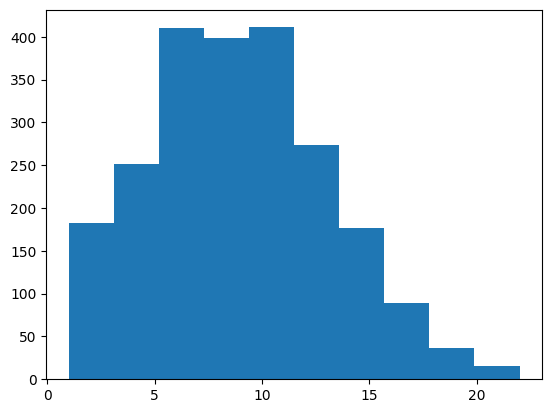

In [27]:
import matplotlib.pyplot as plt
plt.hist(num_topics_used)

In [ ]:
# models_ = []
# num_topics = [i for i in range(5, 101, 5)]
# for i in num_topics:
#     models_.append(models.ldamodel.LdaModel(corpus, id2word=corpus.id2word, num_topics=i, alpha='auto'))
    # num_topics_used = [len(model[doc]) for doc in corpus]

In [ ]:
# import numpy as np
# np.set_printoptions(suppress=True)
# for m in models_:
#     num_topics_used = [len(m[doc]) for doc in corpus]
#     plt.figure()
#     plt.hist(num_topics_used)
#     plt.title(f'{np.round(m.alpha[0])} {m.num_topics}')
#     plt.plot()

In [ ]:
# from gensim.models import CoherenceModel
# u_mass_coh = []
#
# for m in models_:
#     cm = CoherenceModel(model=m, corpus=corpus, coherence='u_mass')
#     u_mass_coh.append(cm.get_coherence())

In [ ]:
# plt.xlabel('num_topics')
# plt.ylabel('coherence')
# plt.plot(num_topics, u_mass_coh )
# plt.title('Metric – u_mass')
# plt.show()

In [ ]:
# models_[np.argmax(u_mass_coh)].num_topics


In [9]:
import nltk
from nltk.corpus import stopwords
import string
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
not_preprocessed_texts = []
preprocessed_texts = []
for i in texts:
    tokens = nltk.word_tokenize(i)
    _ = []
    __ = []
    for t in tokens:
        __.append(t)
        if t.isalpha():
            if t.lower() not in stop_words and t not in list(string.punctuation) and t not in ['``', "''"]:
                _.append(lemmatizer.lemmatize(t.lower()))
    preprocessed_texts.append(_)
    not_preprocessed_texts.append(__)

In [29]:
new_vocab_preprocessed = []
new_vocab_not_preprocessed = []
for t in preprocessed_texts:
    for w in t:
        if w not in new_vocab_preprocessed:
            new_vocab_preprocessed.append(w)
for t in not_preprocessed_texts:
    for w in t:
        if w not in new_vocab_not_preprocessed:
            new_vocab_not_preprocessed.append(w)


In [106]:
new_vocab_preprocessed_dict = {v: k for k, v in enumerate(new_vocab_preprocessed)}
new_vocab_not_preprocessed_dict = {v: k for k, v in enumerate(new_vocab_not_preprocessed)}

In [99]:
file = open("new_ap_preprocessed/new_vocab.txt", "w")
for i in new_vocab_preprocessed:
    file.write(i + "\n")
file.close()

In [108]:
file = open("new_ap_not_preprocessed/new_vocab_not_preprocessed.txt", "w")
for i in new_vocab_not_preprocessed:
    file.write(i + "\n")
file.close()

In [109]:
new_ap = []
for text in preprocessed_texts:
    _ = []
    _.append(str(len(text)))
    for w in text:
        if w.isalpha():
            _.append(f"{new_vocab_preprocessed_dict[w]}:{text.count(w)}")
    new_ap.append(_)

In [154]:
new_ap = []
for text in not_preprocessed_texts:
    _ = []
    _.append(str(len(text)))
    for w in text:
            _.append(f"{new_vocab_not_preprocessed_dict[w]}:{text.count(w)}")
    new_ap.append(_)

In [101]:
file = open("new_ap_preprocessed/new_ap.dat", "w")
for i in new_ap:
    file.write(" ".join(i) + "\n")
file.close()

In [156]:
file = open("new_ap_not_preprocessed/new_ap_.dat", "w")
for i in new_ap:
    file.write(" ".join(i) + "\n")
file.close()

In [138]:
corpus_preprocessed = corpora.BleiCorpus('new_ap_preprocessed/new_ap.dat', 'new_ap_preprocessed/new_vocab.txt')
model_ = models.ldamodel.LdaModel(corpus_preprocessed, id2word = corpus_preprocessed.id2word)
doc_ = corpus_preprocessed.docbyoffset(0) # первый документ
topics_ = model[doc]
print(topics_)


[(9, 0.19660912), (18, 0.011204545), (31, 0.0104251), (36, 0.070612244), (40, 0.39683765), (54, 0.011671289), (64, 0.25243077), (75, 0.010528072), (99, 0.012149289)]


In [10]:
corpus_not_preprocessed = corpora.BleiCorpus('new_ap_not_preprocessed/new_ap_.dat', 'new_ap_not_preprocessed/new_vocab_not_preprocessed.txt')
corpus_preprocessed = corpora.BleiCorpus('new_ap_preprocessed/new_ap.dat', 'new_ap_preprocessed/new_vocab.txt')
# model_ = models.ldamodel.LdaModel(corpus_not_preprocessed, id2word = corpus_not_preprocessed.id2word)
# doc_ = corpus_not_preprocessed.docbyoffset(0) # первый документ
# topics_ = model[doc]
# print(topics_)


In [33]:
preprocessed_texts[0]

['student',
 'private',
 'baptist',
 'school',
 'allegedly',
 'killed',
 'one',
 'teacher',
 'wounded',
 'another',
 'firing',
 'filled',
 'classroom',
 'apparently',
 'snapped',
 'school',
 'pastor',
 'said',
 'know',
 'could',
 'happened',
 'said',
 'george',
 'sweet',
 'pastor',
 'atlantic',
 'shore',
 'baptist',
 'church',
 'good',
 'christian',
 'school',
 'pride',
 'discipline',
 'kid',
 'good',
 'kid',
 'atlantic',
 'shore',
 'christian',
 'school',
 'sophomore',
 'arrested',
 'charged',
 'murder',
 'attempted',
 'murder',
 'malicious',
 'assault',
 'related',
 'felony',
 'charge',
 'friday',
 'morning',
 'shooting',
 'police',
 'would',
 'release',
 'boy',
 'name',
 'juvenile',
 'neighbor',
 'relative',
 'identified',
 'nicholas',
 'elliott',
 'police',
 'said',
 'student',
 'tackled',
 'teacher',
 'student',
 'semiautomatic',
 'pistol',
 'jammed',
 'fired',
 'classroom',
 'student',
 'cowered',
 'floor',
 'cry',
 'jesus',
 'save',
 'u',
 'god',
 'save',
 'u',
 'friend',
 'fami

In [3]:
 num_topics_ = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

In [4]:
models_texts_preprocessed = [models.ldamodel.LdaModel(corpus_preprocessed, id2word = corpus_preprocessed.id2word, num_topics=i, alpha='auto') for i in num_topics_]
models_texts_not_preprocessed = [models.ldamodel.LdaModel(corpus_not_preprocessed, id2word = corpus_not_preprocessed.id2word, num_topics=i, alpha='auto') for i in num_topics_]

In [11]:
from gensim.corpora import Dictionary
coherence_preprocessed_umass = []
coherence_not_preprocessed_umass = []

coherence_preprocessed_c_v = []
coherence_not_preprocessed_c_v = []
from gensim.models import CoherenceModel
for m in models_texts_preprocessed:
    coherencemodel1 = CoherenceModel(model=m, corpus=corpus_preprocessed, coherence='u_mass')
    coherencemodel2 = CoherenceModel(model=m, texts=preprocessed_texts, dictionary=Dictionary(preprocessed_texts), coherence='c_v')

    coherence_preprocessed_umass.append(coherencemodel1.get_coherence())
    coherence_preprocessed_c_v.append(coherencemodel2.get_coherence())

for m in models_texts_not_preprocessed:
    coherencemodel1 = CoherenceModel(model=m, corpus=corpus_not_preprocessed, coherence='u_mass')
    coherencemodel2 = CoherenceModel(model=m, texts=not_preprocessed_texts, dictionary=Dictionary(not_preprocessed_texts), coherence='c_v')

    coherence_not_preprocessed_umass.append(coherencemodel1.get_coherence())
    coherence_not_preprocessed_c_v.append(coherencemodel2.get_coherence())

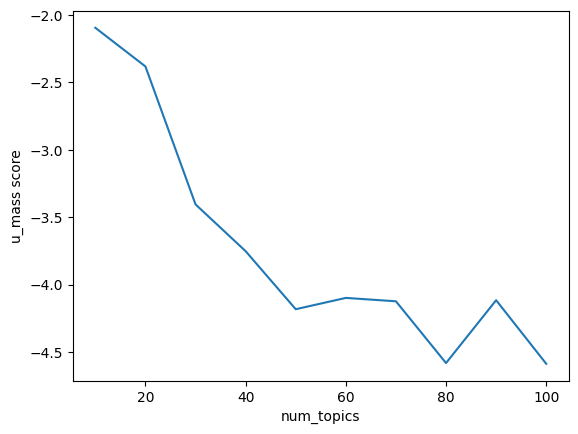

In [47]:
 import numpy as np
plt.plot(num_topics_,coherence_preprocessed_umass )
plt.xlabel('num_topics')
plt.ylabel('u_mass score')
plt.show()

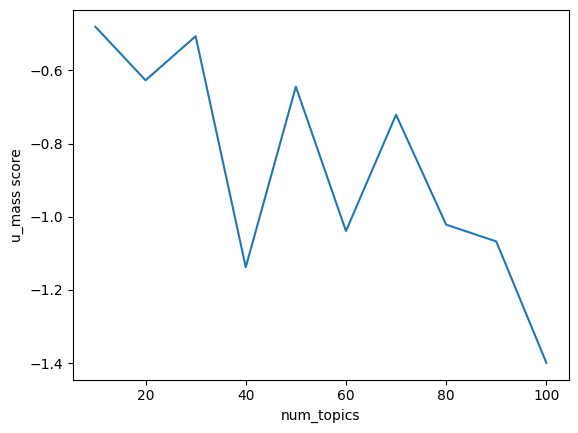

In [48]:
plt.plot(num_topics_,coherence_not_preprocessed_umass )
plt.xlabel('num_topics')
plt.ylabel('u_mass score')
plt.show()

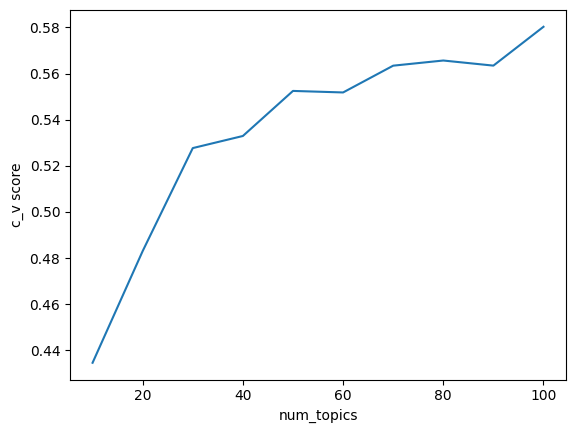

In [49]:
plt.plot(num_topics_,coherence_preprocessed_c_v )
plt.xlabel('num_topics')
plt.ylabel('c_v score')
plt.show()

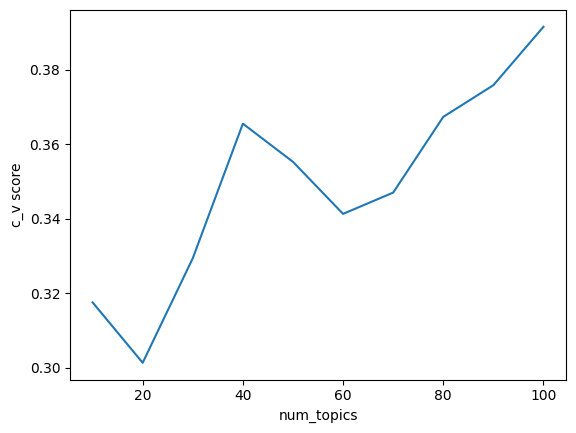

In [50]:
plt.plot(num_topics_,coherence_not_preprocessed_c_v)
plt.xlabel('num_topics')
plt.ylabel('c_v score')
plt.show()

In [12]:
best_model =models.ldamodel.LdaModel(corpus_preprocessed, id2word = corpus_preprocessed.id2word, num_topics=100, alpha='auto')

In [14]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis
vis = gensimvis.prepare(best_model, corpus_preprocessed, Dictionary(preprocessed_texts))
pyLDAvis.enable_notebook()
vis


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
62    -0.058348  0.076479       1        1  12.337931
97    -0.090988  0.042459       2        1   6.196374
20    -0.053808  0.067200       3        1   4.522444
15    -0.060973  0.072981       4        1   3.404207
86    -0.087501  0.059940       5        1   3.313833
...         ...       ...     ...      ...        ...
17     0.090125 -0.015086      96        1   0.125571
98     0.086649 -0.043245      97        1   0.124191
47     0.046368 -0.008411      98        1   0.122752
48     0.077960 -0.027160      99        1   0.113133
23     0.100053 -0.036738     100        1   0.050410

[100 rows x 5 columns], topic_info=             Term          Freq         Total  Category  logprob  loglift
16        baptist  33816.000000  33816.000000   Default  30.0000  30.0000
306       portion   7478.000000   7478.000000   Default  29.0000  29.0000
208         asked   4972.000000   4972.000000   Default  28.0000  28.0000
80        gunshot   8577.000000   8577.000000   Default  27.0000  27.0000
1008   especially   2681.000000   2681.000000   Default  26.0000  26.0000
...           ...           ...           ...       ...      ...      ...
245   engineering      0.990081   3571.218374  Topic100  -6.6017  -0.5979
254       general      0.951802   4077.785769  Topic100  -6.6411  -0.7700
138       primary      0.953227   4303.690281  Topic100  -6.6396  -0.8224
175       tackled      0.896064   2092.138293  Topic100  -6.7015  -0.1629
329           run      0.936978   7431.844633  Topic100  -6.6568  -1.3859

[6183 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
3733      1  0.093675  abandon
3733      2  0.054644  abandon
3733      3  0.003903  abandon
3733      4  0.058547  abandon
3733      5  0.101482  abandon
...     ...       ...      ...
3689      1  0.665619    zwick
3689      2  0.020170    zwick
3689     54  0.020170    zwick
3689     60  0.020170    zwick
3689     80  0.181533    zwick

[76175 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[63, 98, 21, 16, 87, 69, 12, 37, 54, 4, 39, 5, 86, 91, 53, 51, 78, 35, 85, 94, 93, 92, 15, 58, 2, 72, 40, 26, 62, 30, 56, 42, 80, 25, 28, 20, 76, 89, 46, 75, 8, 88, 77, 65, 73, 79, 45, 34, 83, 14, 13, 33, 81, 22, 61, 52, 82, 59, 7, 10, 67, 31, 50, 32, 9, 100, 84, 41, 29, 74, 6, 57, 36, 3, 64, 96, 60, 68, 97, 71, 70, 1, 90, 44, 11, 19, 47, 55, 17, 95, 43, 23, 38, 27, 66, 18, 99, 48, 49, 24])